In [8]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import numpy as np
sys.path.insert(1,"/home/showalte/research/prob_seq_queries/")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from seq_queries.utils import read_pkl, write_pkl
from seq_queries.viz import *

In [3]:
print(os.getcwd())

/home/showalte/research/prob_seq_queries/notebooks


# Search - Sampling Alignment

In [5]:
samples = [100,1000,10000,100000]
paths = ["data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_100s_128m.pkl",
         "data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_1000s_128m.pkl",
         "data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_10000s_128m.pkl",
         "data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_100000s_128m.pkl"]
beam_search = "data/beam_search/shakespeare/beam_search_lb_a_rt_thou?_10seq_<a>_55.pkl"

In [12]:
lower_bound = read_pkl(beam_search)
for p in paths:
    data = read_pkl(p)
    print(len(data))

55
55
55
55


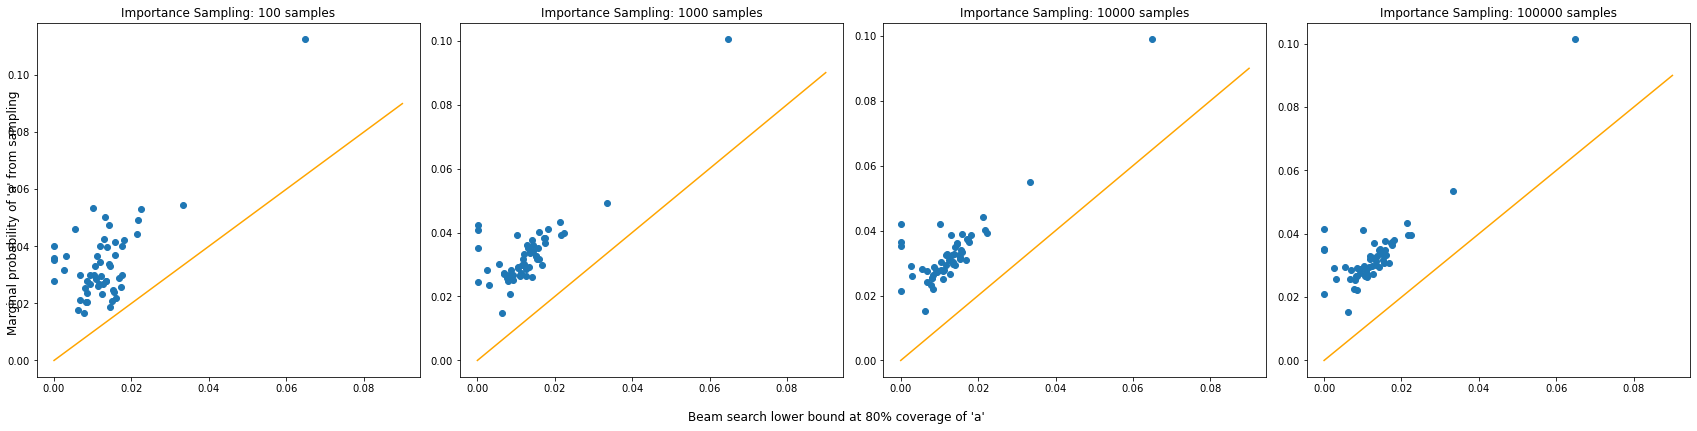

In [26]:
samples = [100,1000,10000,100000]
title = "Importance Sampling: {} samples"
fig, axs = plt.subplots(1,4, figsize = (24,6))

for i in range(len(paths)):
    data = read_pkl(paths[i])
    ref = np.arange(0,.1,0.01)
    axs[i].plot(list(ref),list(ref),linestyle="-", color = "orange")
    axs[i].scatter(lower_bound, data)
    axs[i].set_title(title.format(samples[i]))
    
fig.supxlabel("Beam search lower bound at 80% coverage of 'a'")
fig.supylabel("Marginal probability of 'a' from sampling")
plt.tight_layout()

## Ground Truth Exploration

In [21]:
data = read_pkl("data/ground_truth/shakespeare/val_dl/val-dl_gt_18h_20s_exc-dynamic.pkl")

In [5]:
data = read_pkl("data/random_sampling/shakespeare/val-dl_random-sampling_05h_30s_exc-dynamic.pkl")
data['sample_estimates'].shape

torch.Size([2287, 100000])

(array([178., 175., 174., 152., 154., 131., 111.,  96.,  81.,  65.,  66.,
         76.,  57.,  42.,  44.,  46.,  28.,  30.,  24.,  35.,  27.,  20.,
         15.,  22.,  13.,  14.,  12.,  11.,  11.,  13.,   8.,  11.,   9.,
          9.,   8.,  10.,  10.,  10.,   5.,   1.,   8.,   8.,   5.,   8.,
          4.,   4.,   4.,   7.,   2.,  11.,   5.,   8.,   8.,   3.,   5.,
          8.,   4.,   5.,   3.,   5.,   1.,   5.,   7.,   2.,   6.,   2.,
          3.,   3.,   2.,   5.,   2.,   4.,   3.,   2.,   1.,   2.,   3.,
          7.,   3.,   3.,   4.,   5.,   1.,   3.,   1.,   3.,   5.,   5.,
          0.,   5.,   4.,   4.,   3.,   2.,   3.,   2.,   6.,   7.,  16.,
         23.]),
 array([9.7172733e-06, 1.0007591e-02, 2.0005465e-02, 3.0003339e-02,
        4.0001214e-02, 4.9999088e-02, 5.9996959e-02, 6.9994837e-02,
        7.9992712e-02, 8.9990579e-02, 9.9988453e-02, 1.0998633e-01,
        1.1998420e-01, 1.2998208e-01, 1.3997996e-01, 1.4997782e-01,
        1.5997569e-01, 1.6997357e-01, 1.799714

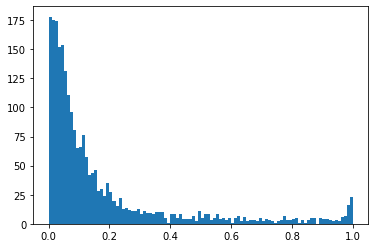

In [11]:
plt.hist(data,bins = 100)

In [40]:
data = read_pkl("data/ground_truth/shakespeare/val_dl/val-dl_gt_18h_20s_exc-dynamic.pkl")

In [44]:
samp = read_pkl("data/random_sampling/shakespeare/val-dl_mc-rand_18h_20s_exc-dynamic.pkl")
samp.shape

(1, 100000)

ValueError: x and y must be the same size

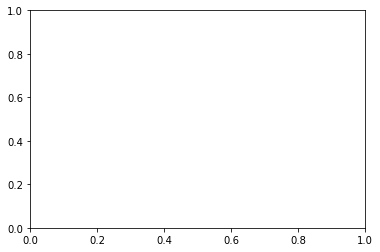

In [43]:
plt.scatter(data, samp.mean(axis = -1))

In [36]:
data = read_pkl("data/beam_search/shakespeare/val-dl_gt_16h_20s_0.9b_exc-dynamic.pkl")

In [45]:
data = read_pkl("data/beam_search/shakespeare/val-dl_gt_16h_20s_0.95b_exc-dynamic.pkl")

(array([392., 399., 408., 258., 147., 130.,  73.,  62.,  41.,  29.,  30.,
         33.,  24.,  28.,  29.,  23.,  17.,  20.,  15.,  14.,  12.,   6.,
          5.,   1.,   4.,   3.,   5.,   2.,   1.,   1.,   1.,   3.,   4.,
          5.,   1.,   2.,   0.,   3.,   1.,   2.,   3.,   1.,   1.,   2.,
          2.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   2.,   0.,   2.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   3.,   1.,
          0.,   3.,   1.,   1.,   1.,   0.,   1.,   1.,   4.,   0.,   2.,
          7.]),
 array([4.88647856e-06, 9.99469869e-03, 1.99845098e-02, 2.99743228e-02,
        3.99641320e-02, 4.99539450e-02, 5.99437580e-02, 6.99335709e-02,
        7.99233839e-02, 8.99131894e-02, 9.99030024e-02, 1.09892815e-01,
        1.19882628e-01, 1.29872441e-01, 1.39862254e-01, 1.49852067e-01,
        1.59841880e-01, 1.6983

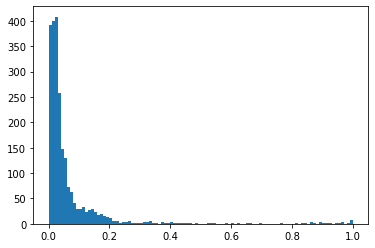

In [46]:
plt.hist(data,bins=100)

(array([378., 346., 373., 283., 178., 124.,  97.,  73.,  52.,  33.,  35.,
         31.,  28.,  27.,  30.,  23.,  15.,  18.,  15.,  15.,  13.,   5.,
          4.,   2.,   1.,   5.,   5.,   1.,   1.,   2.,   0.,   5.,   3.,
          5.,   2.,   1.,   1.,   1.,   2.,   2.,   2.,   1.,   2.,   1.,
          3.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   2.,   0.,   0.,   2.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   4.,   1.,
          0.,   3.,   0.,   1.,   1.,   0.,   1.,   1.,   4.,   0.,   2.,
          7.]),
 array([2.74657168e-08, 9.98988748e-03, 1.99797489e-02, 2.99696084e-02,
        3.99594679e-02, 4.99493293e-02, 5.99391907e-02, 6.99290484e-02,
        7.99189135e-02, 8.99087712e-02, 9.98986289e-02, 1.09888494e-01,
        1.19878352e-01, 1.29868209e-01, 1.39858067e-01, 1.49847940e-01,
        1.59837797e-01, 1.6982

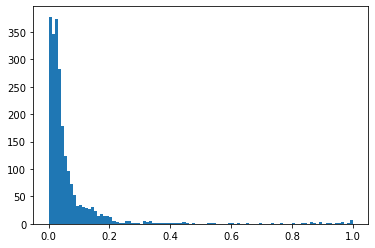

In [38]:
plt.hist(data,bins=100)

In [18]:
impsamp = data.mean(axis=1)

In [25]:
def gt_v_samp_plot(gt_data_path, samp_data_path_imp, samp_data_path_rand,pvals,
                   sample_sizes, shuffle = False,gt_type="Ground truth",
                   gt_dict_key=None,sample_dict_key=None):
    assert len(sample_sizes)%2 == 0,"Must have even # samples"
    title = "Number of sample: {}"
    fig, axs = plt.subplots(len(sample_sizes)//2,2, figsize = (len(sample_sizes)*3,12))
    gt_data = read_pkl(gt_data_path)
    samp_data_imp = read_pkl(samp_data_path_imp)
    samp_data_rand = read_pkl(samp_data_path_rand)

    print(gt_data.shape, samp_data_imp.shape, samp_data_rand.shape)

    for i in range(len(sample_sizes)):
        # data = read_pkl(paths[i])
        ref = np.arange(0,1,0.01)
        axs[i//2][i%2].scatter(gt_data, samp_data_rand[:,:samples[i]].mean(axis = -1), color = "green", label = "random")
        axs[i//2][i%2].scatter(gt_data, samp_data_imp[:,:samples[i]].mean(axis = -1), color = "blue", label = "importance")
        axs[i//2][i%2].set_title(title.format(samples[i]))
        axs[i//2][i%2].plot(list(ref),list(ref),linestyle="dashed", color = "red")
        axs[i//2][i%2].legend()
        axs[i//2][i%2].set_ylim((0,1))

    fig.supxlabel(f"{gt_type} marginal probability: {pvals[0]}h-{pvals[1]}s")
    fig.supylabel("Marginal probability from sampling")
    plt.tight_layout()
    return axs

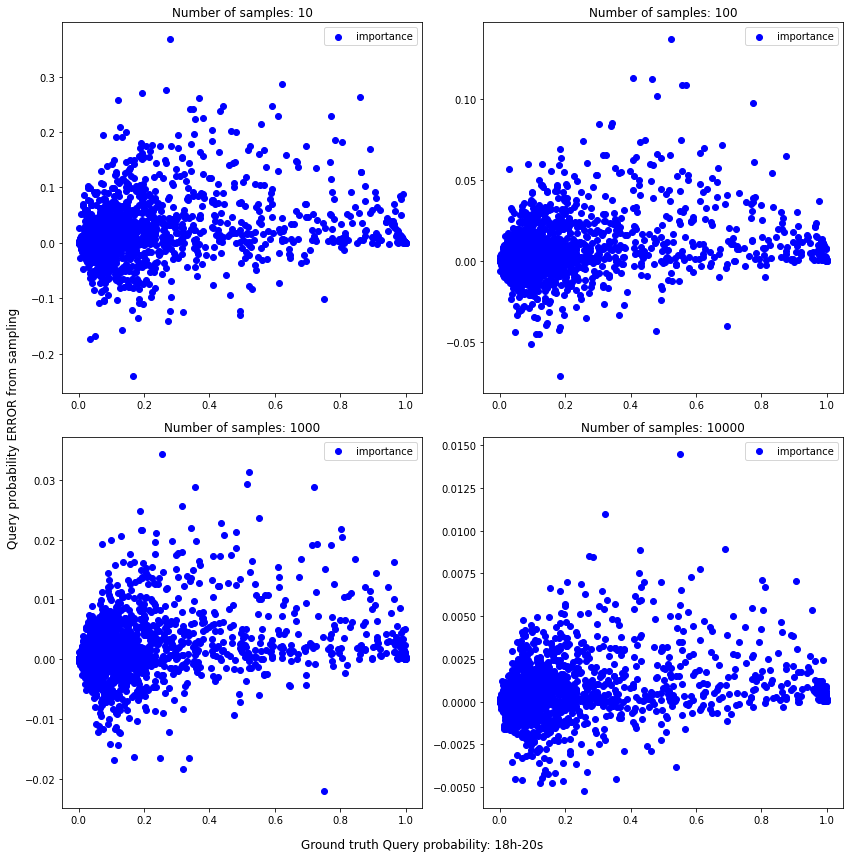

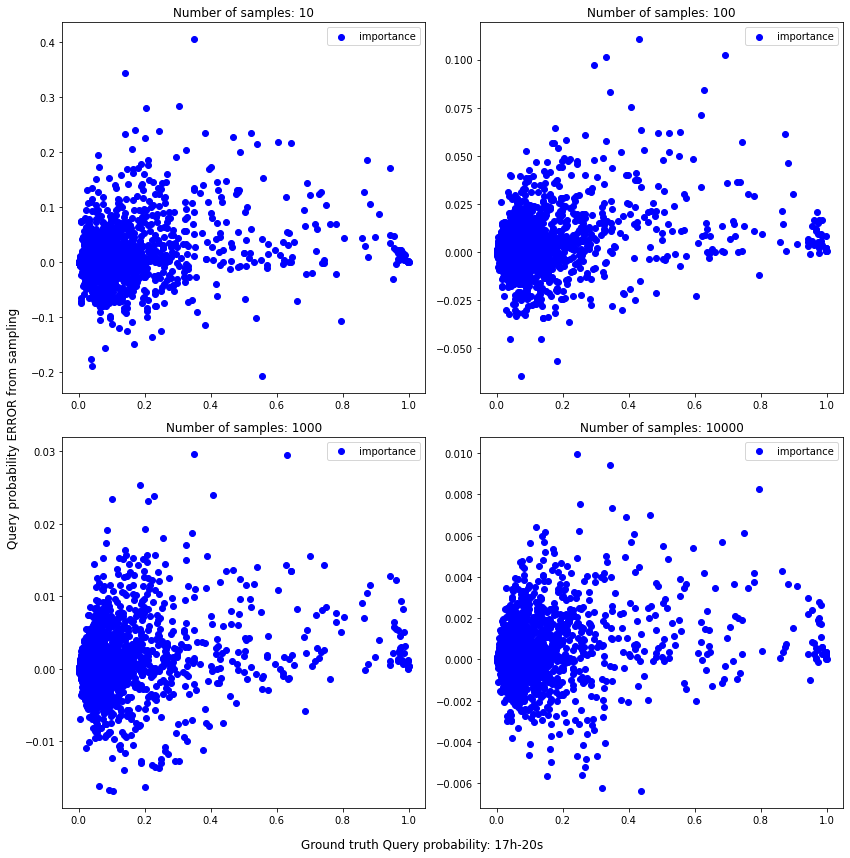

In [21]:
samples = [100,1000,10000,100000]
dataset = 'shakespeare'
path_templates =["../data/ground_truth/{0}/val_dl/val-dl_{0}_ground-truth_{1}h_{2}s.pkl",
         "../data/importance_sampling/{0}/val_dl/val-dl_{0}_importance-sampling_{1}h_{2}s_10000mc.pkl",
         "../data/beam_search_is_hybrid/{0}/val_dl/val-dl_{0}_beam-search-is-hybrid_{1}h_{2}s_10000mc.pkl"
                ]
path_vals = [[18,20],[17,20]]
# print("HI")

for pvals in path_vals:
    gt_path = path_templates[0].format(dataset,*pvals)
    samp_path_imp = path_templates[1].format(dataset,*pvals)
    samp_path_rand = path_templates[2].format(dataset,*pvals)
    print("====="*10)
    # try:
    plot_search_vs_sample_relative(gt_path, samp_path_imp,pvals[0],pvals[1],4,samp_data_path_rand=samp_path_rand,
                          sample_sizes=[10,100,1000,10000],)
    plt.show()
    print("====="*10)
        # except Exception as e:
        #     print(e)
        #     print(f"failed for pvals {pvals}")
    

In [7]:
def new_gt_v_samp_plot(gt_data_path, samp_data_path_imp, samp_data_path_rand,pvals,
                   sample_sizes, shuffle = False,gt_type="Ground truth",
                   gt_dict_key='dist_lower_bound',sample_dict_key='sample_estimates'):
    title = "Shakespeare dataset: {} samples per estimate"
    fig, axs = plt.subplots(figsize=(8,8))
    gt_data = read_pkl(gt_data_path)
    samp_data_imp = read_pkl(samp_data_path_imp)
    samp_data_rand = read_pkl(samp_data_path_rand)
    gt_data = gt_data[gt_dict_key].flatten().cpu()
    samp_data_imp = samp_data_imp[sample_dict_key].cpu()
    samp_data_rand = samp_data_rand[sample_dict_key].cpu()
    print(gt_data.shape, samp_data_imp.shape, samp_data_rand.shape)


    ref = np.arange(0,1,0.01)
    plt.scatter(gt_data, samp_data_rand, color = "green", label = "random")
    plt.scatter(gt_data, samp_data_imp, color = "blue", label = "importance")
    plt.title(title.format(samples[-1]))
    plt.plot(list(ref),list(ref),linestyle="dashed", color = "red")
    plt.legend()
    plt.ylim(0,1)

    plt.xlabel(f"{gt_type} marginal probability: {pvals[0]}h-{pvals[1]}s")
    plt.ylabel("Marginal probability from sampling")
    plt.tight_layout()
    return plt

## Lower Bounds

torch.Size([155516]) torch.Size([155516]) torch.Size([155516])


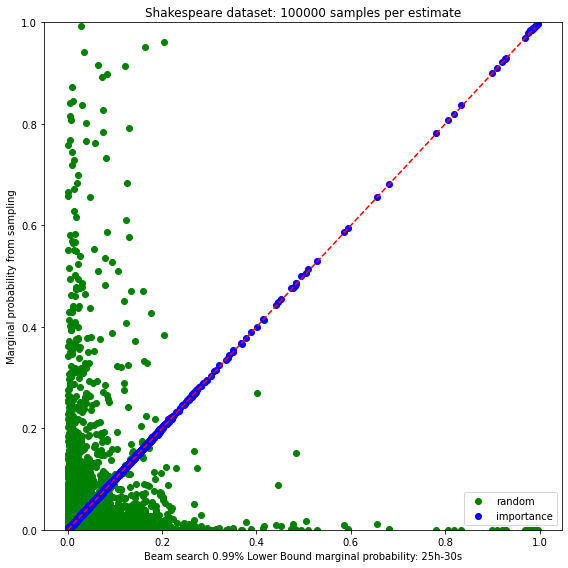

torch.Size([155516]) torch.Size([155516]) torch.Size([155516])


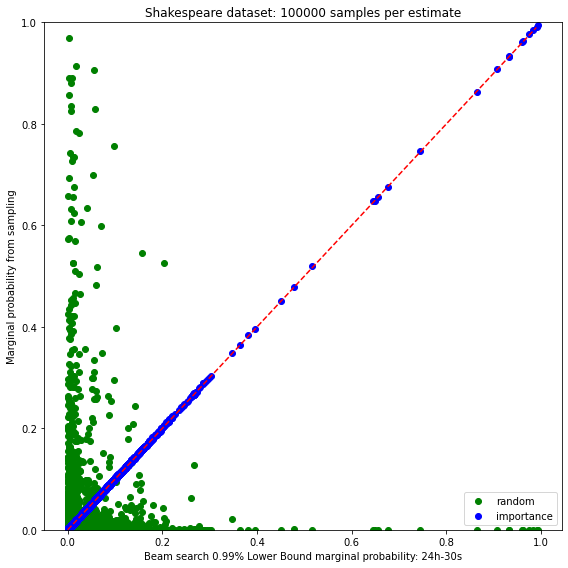

torch.Size([155516]) torch.Size([155516]) torch.Size([155516])


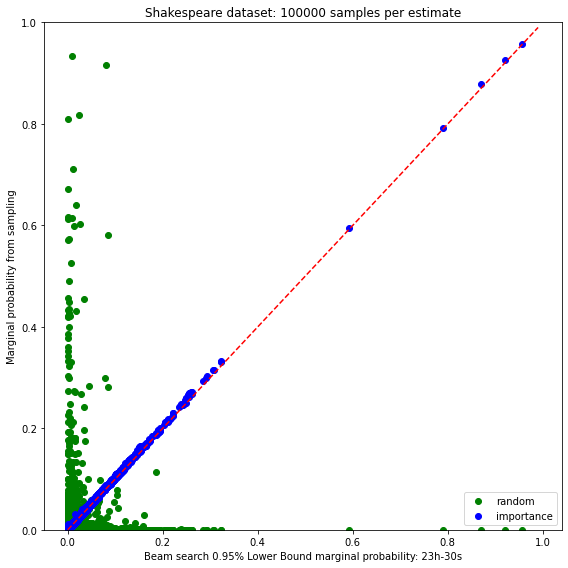

In [44]:
samples = [100,1000,10000,100000]
path_templates =["data/beam_search/shakespeare/val-dl_beam-search_{}h_{}s_{}c_exc-dynamic.pkl",
         "data/importance_sampling/shakespeare/val-dl_importance-sampling_{}h_{}s_exc-dynamic.pkl",
        "data/random_sampling/shakespeare/val-dl_random-sampling_{}h_{}s_exc-dynamic.pkl"]
path_vals = [[25,30,0.99],[24,30,0.99],[23,30,0.95]]

for pvals in path_vals:
    gt_path = path_templates[0].format(*pvals)
    samp_path_imp = path_templates[1].format(*pvals[:2])
    samp_path_rand = path_templates[2].format(*pvals[:2])
    print("====="*10)
    # try:
    new_gt_v_samp_plot(gt_path, samp_path_imp, samp_path_rand,pvals,
                   sample_sizes=samples,gt_type=f"Beam search {pvals[2]}% Lower Bound",
                  gt_dict_key="dist_lower_bound",sample_dict_key='sample_estimates')
    plt.show()
    print("====="*10)
    # except Exception as e:
    #     print(e)
    #     print(f"failed for pvals {pvals}")

## Amazon and App Data

In [4]:
samples = [100,1000,10000,100000]
path_templates =["data/beam_search/shakespeare/val-dl_shakespeare_ground-truth_{}h_{}s.pkl",
         "data/importance_sampling/shakespeare/val-dl_importance-sampling_{}h_{}s_10000.pkl",
        "data/random_sampling/shakespeare/val-dl_random-sampling_{}h_{}s_exc-dynamic.pkl"]
path_vals = [[18,20]]

for pvals in path_vals:
    gt_path = path_templates[0].format(*pvals)
    samp_path_imp = path_templates[1].format(*pvals[:2])
    samp_path_rand = path_templates[2].format(*pvals[:2])
    print("====="*10)
    # try:
    plot_search_v_sample(gt_path, samp_path_imp, pvals, 
                   sample_sizes=samples,gt_type=f"Beam search {pvals[2]}% Lower Bound",
                  gt_dict_key="dist_lower_bound",sample_dict_key='sample_estimates')
    plt.show()
    print("====="*10)

NameError: name 'plot_search_v_sample' is not defined